# Statistical analysis of a stock price

## Introduction
Stock analysis is a method for investors and traders to make buying and selling decisions. By studying and evaluating past and current data, investors and traders attempt to gain an edge in the markets by making informed decisions.


# Dataset analysis
For this project, I will use the closing prices of Tech Company’s stock from the past 10 years (2007-01-01 to NOW). Analysis data will be loaded from Yahoo Finance, which offers historical and real-time stock market data. 


#### Stock analysis is a method for investors and traders to make buying and selling decisions. 
By studying and evaluating past and current data, investors and traders attempt to gain an edge in the markets by making informed decisions.

##### The stock market is always considered a challenge for statistics
Somebody thinks that knowing the statistics of a market lets us beat it and earn money. The reality can be quite different.

Stock analysis involves comparing a company’s current financial statement to its financial statements in previous years to give an investor a sense of whether the company is growing, stable, or deteriorating. 
.
### There are two basic types of stock analysis

fundamental analysis and technical analysis. Fundamental analysis concentrates on data from sources, including financial records, economic reports, company assets, and market share. To conduct fundamental analysis on a public company or sector, investors and analysts typically analyze the metrics on a company’s financial statements – balance sheet, income statement, cash flow statement, and footnotes. 
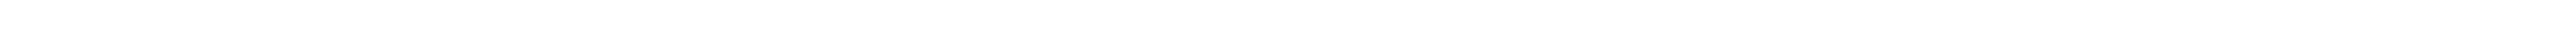

# Close Price
Closing prices are useful markers for investors to use to assess changes in stock prices over time.
The closing price on one day can be compared to the closing price on the previous day, 30 days earlier or a year earlier, to measure the changes in market toward that stock. 

# Data Visualization
Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.
Python offers multiple great graphing libraries that come packed with lots of different features. No matter if you want to create interactive, live or highly customized plots python has an excellent library for you.

## First we need to Import Libraries :)
leathery i import all of the libraries in this project
it just for a rainy day :)

In [1]:
import math
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns
import stemgraphic
from itertools import permutations
from itertools import combinations
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import skewtest
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# from scipy import norm
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import statistics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

## Specify the start date and end date & Load the Dataset
There are multiple variables in the dataset: date,open,high,low,close,Volume,Adj Close

In [2]:
StartDate = dt.datetime(2009, 1, 1)
EndDate   = dt.datetime(2022, 1, 1)
# EndDate = dt.datetime.now()

google = web.DataReader("GOOGL", data_source='yahoo', start =StartDate, end=EndDate ) #google
apple = web.DataReader("AAPL", data_source='yahoo', start =StartDate, end=EndDate ) 
microsoft = web.DataReader("MSFT", data_source='yahoo', start =StartDate, end=EndDate ) 
fb = web.DataReader("FB", data_source='yahoo', start =StartDate, end=EndDate )
nvidia = web.DataReader("NVDA", data_source='yahoo', start =StartDate, end=EndDate )
amd = web.DataReader("AMD", data_source='yahoo', start =StartDate, end=EndDate )
amazon = web.DataReader("AMZN", data_source='yahoo', start =StartDate, end=EndDate )
netflix = web.DataReader("NFLX", data_source='yahoo', start =StartDate, end=EndDate )
tesla = web.DataReader("TSLA", data_source='yahoo', start =StartDate, end=EndDate ) #tesla
ford  = web.DataReader("F", data_source='yahoo', start =StartDate, end=EndDate ) #ford
gm    = web.DataReader("GM", data_source='yahoo', start =StartDate, end=EndDate ) #General Motors

In [3]:
google.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
google.shape

(3273, 6)

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2009-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3273 non-null   float64
 1   Low        3273 non-null   float64
 2   Open       3273 non-null   float64
 3   Close      3273 non-null   float64
 4   Volume     3273 non-null   float64
 5   Adj Close  3273 non-null   float64
dtypes: float64(6)
memory usage: 179.0 KB


In [6]:
len(google)

3273

In [7]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,161.071075,152.902908,154.454453,160.820816,7213779.0,160.820816
2009-01-05,165.785782,157.657654,160.660660,164.189194,9768222.0,164.189194
2009-01-06,170.570572,163.358353,166.656662,167.197205,12837550.0,167.197205
2009-01-07,165.620621,159.534531,164.324326,161.166168,8980011.0,161.166168
2009-01-08,162.757751,158.828827,159.299301,162.757751,7194199.0,162.757751



The standard deviation tells how much a set of data deviates from its mean. It is a measure of how spread out a given set of data is. The more spread out the higher the standard deviation.

In [8]:
google['Open']

Date
2009-01-02     154.454453
2009-01-05     160.660660
2009-01-06     166.656662
2009-01-07     164.324326
2009-01-08     159.299301
                 ...     
2021-12-27    2945.120117
2021-12-28    2964.719971
2021-12-29    2932.889893
2021-12-30    2933.879883
2021-12-31    2921.000000
Name: Open, Length: 3273, dtype: float64

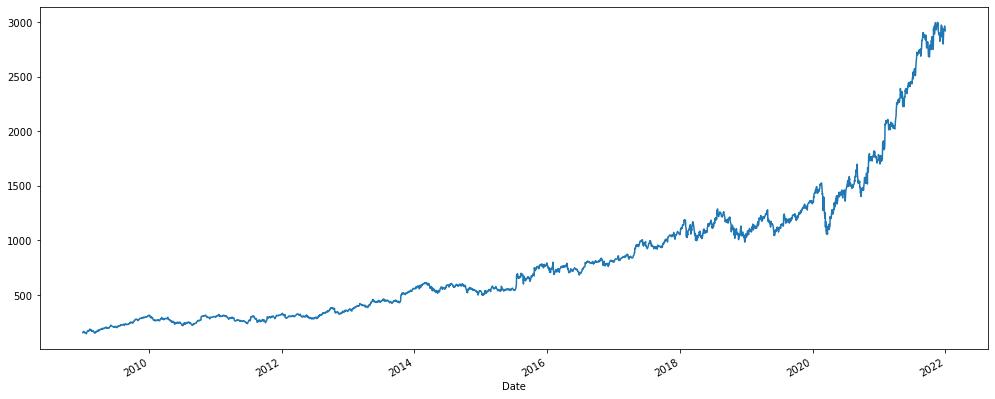

In [9]:
google['Open'].plot(label = 'Google Open Price', figsize=(17,7))
plt.show()

## As you can see, there’s quite a nice bullish trend. There are some drawdowns, but the drift seems to be quite positive.

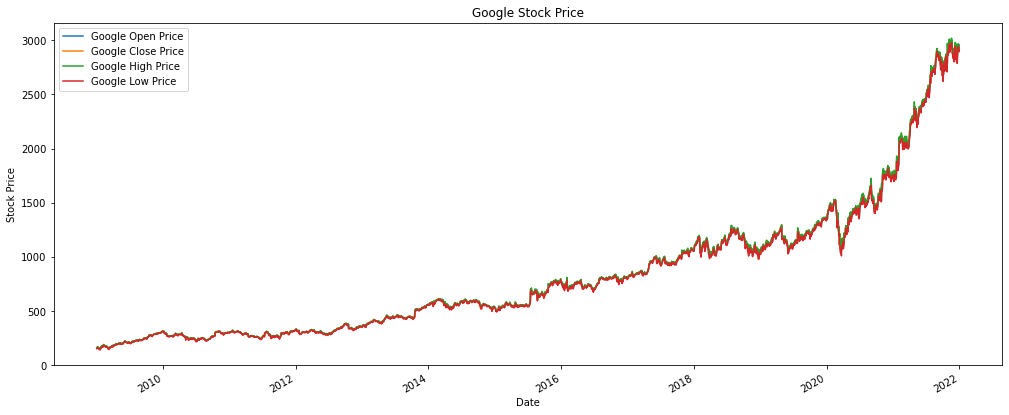

In [10]:
google['Open'].plot(label = 'Google Open Price', figsize=(17,7))
google['Close'].plot(label = 'Google Close Price')
google['High'].plot(label = 'Google High Price')
google['Low'].plot(label = 'Google Low Price')
plt.title("Google Stock Price")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Trading Volume 
Trading volume is the total number of shares of a security that were traded during a given period of time. 

Text(0.5, 1.0, 'Volume Traded by Google')

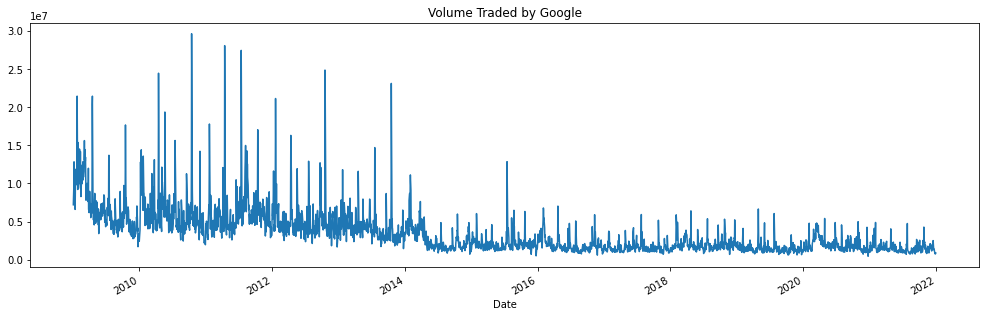

In [11]:
google['Volume'].plot(figsize=(17,5))
plt.title("Volume Traded by Google")

### Summary Statistics
* Mean
* Variance: spread of distribution
* Standard deviation square root of variance
* min and max of data

In [12]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03,3273.000000
mean,831.153496,815.888082,823.641229,823.846104,3.414363e+06,823.846104
std,631.678034,620.125256,625.908871,626.291961,2.821132e+06,626.291961
min,149.899902,141.516510,144.319321,141.516510,4.656000e+05,141.516510
25%,312.312317,307.692688,309.844849,309.609619,1.516200e+06,309.609619
50%,609.429443,602.647644,607.492493,606.861877,2.369100e+06,606.861877
75%,1127.989990,1106.479980,1117.199951,1116.699951,4.520675e+06,1116.699951
max,3019.330078,2977.979980,2999.510010,2996.770020,2.961995e+07,2996.770020


### Stem-and-Leaf Plot
stem-and-leaf plot is a device for presenting quantitative data in a graphical format, similar to a histogram, to assist in visualizing the shape of a distribution.

(<Figure size 540x5148 with 1 Axes>, <Axes:>)

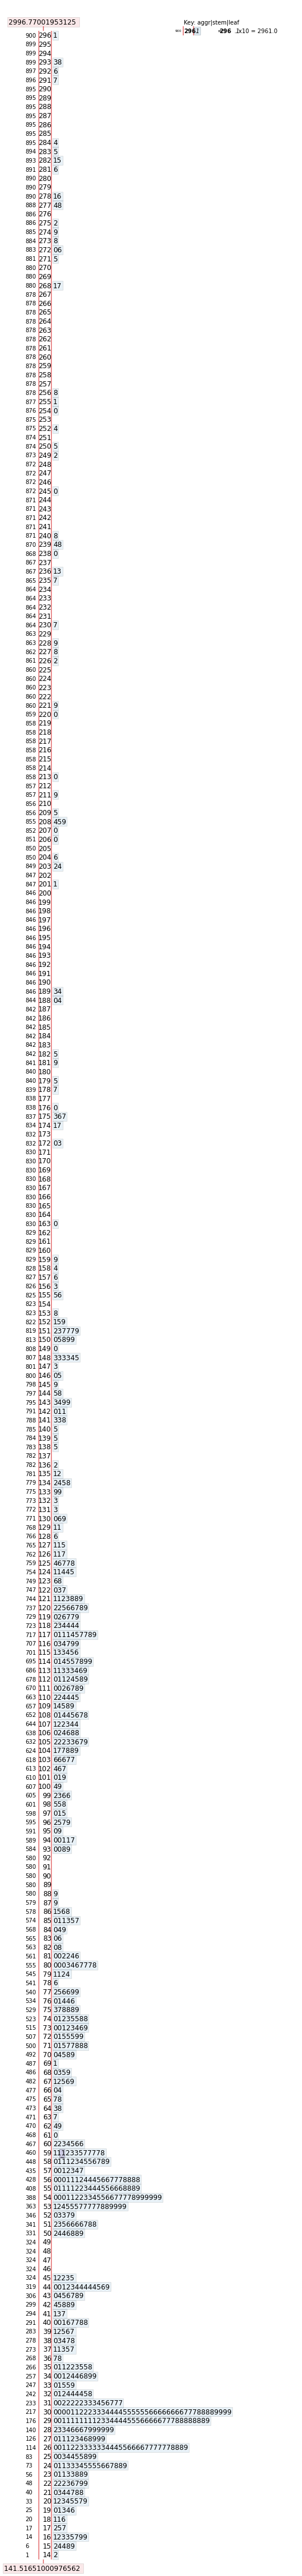

In [13]:
stemgraphic.stem_graphic(google["Close"], scale=10)

### Daily Returns
When you perform the statistical analysis of a stock, it’s very useful to work with its returns and not with the price itself.
The return from one day to another one is the percentage change of the closing price between the two days.
.
In Python, series objects have the pct_change method that allows us to calculate this quantity. The argument is the lag to use. In this article, I’ll use a 1-day lag.

In [14]:
x = google['Close']
returns = x.pct_change(1).dropna()

In [15]:
returns

Date
2009-01-05    0.020945
2009-01-06    0.018320
2009-01-07   -0.036071
2009-01-08    0.009875
2009-01-09   -0.031120
                ...   
2021-12-27    0.006738
2021-12-28   -0.008245
2021-12-29   -0.000218
2021-12-30   -0.003099
2021-12-31   -0.009224
Name: Close, Length: 3272, dtype: float64

We are now going to calculate some insights about the probability distribution of returns.
* Let’s make a first raw histogram of returns.


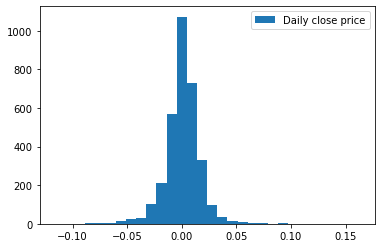

In [16]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

As you can see, it’s quite centered around zero and it seems symmetric. However, we can see that this histogram has tails that don’t seem to be neglectable.
Let’s make a boxplot to better understand the distribution of this dataset.

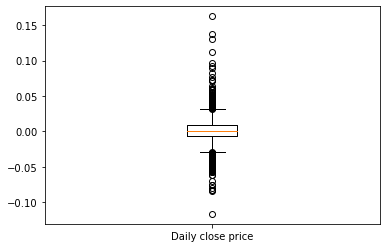

In [17]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

As you can see, it’s full of outliers. The interquartile range (i.e. the height of the box) is quite narrow if compared with the distribution total range. This phenomenon is called fat tails and it’s very common in stock analysis.

* Let’s calculate some observables of our dataset.

In [18]:
returns.describe()

count    3272.000000
mean        0.001019
std         0.016483
min        -0.116342
25%        -0.006428
50%         0.000935
75%         0.009059
max         0.162584
Name: Close, dtype: float64

##### The mean value is:
It’s quite similar to zero, but the fact that it’s positive explains the positive drift of the price time series.
##### Let’s now take a look at the standard deviation:
It’s more than an order of magnitude higher than the mean value. It’s clearly the effect of outliers. In stock price analysis, the standard deviation is a measure of the risk and such a high standard deviation is the reason why stocks are considered risky assets.

##### Let’s take a look at the median:
It’s not so different from the mean value, so we might think that the distribution is symmetrical.

##### Let’s check the skewness of the distribution to better assess the symmetry:
It’s positive, so we can assume that the distribution is not symmetrical (i.e. null skewness) and that the right tail as a not neglectable weight.




In [19]:
skew(returns)

0.49357606477973803

##### If we perform a test on the skewness, we find:
The very low p-value suggests that the skewness of the distribution can’t be neglected, so we can’t assume that it’s symmetrical.




* Finally, we can measure the kurtosis (scipy normalizes the kurtosis so that it is 0 for a normal distribution)


In [20]:
kurtosis(returns)

9.781955988128042

It’s very different from zero, so the distribution is quite different from a normal one.
* A kurtosis test gives us these results:

Again, a very small p-value lets us reject the null hypothesis that the kurtosis is the same as a normal distribution (which is 0).



In [21]:
skewtest(returns)

SkewtestResult(statistic=10.947950467770887, pvalue=6.7968093427743775e-28)

#### Are returns normally distributed?
Although the statistically significant high values of kurtosis and skewness already tell us that the returns aren’t normally distributed, a Q-Q plot will give us graphically clear information.

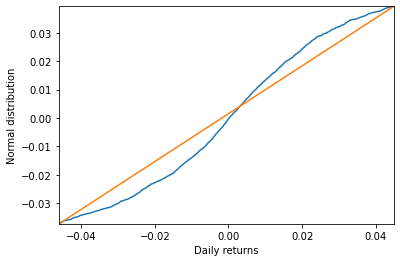

In [22]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

The straight line is what we expect for a normal distribution, while the blue line is what we get from our data. It’s clear that the quantiles of our dataset aren’t comparable with the quantiles of a normal distribution with the same mean and standard deviation.
So, returns aren’t normally distributed

##### Volatility
Once we have ensured the non-normality of the returns probability distribution, let’s take a look at the raw time series.

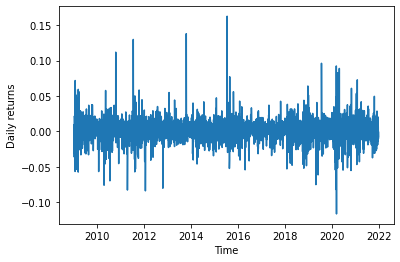

In [23]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

It’s clear that there are time periods with high volatility and other periods with low volatility. This phenomenon is called volatility clustering and it’s very common in the stock market. Practically speaking, the standard deviation changes during time, making the time series non-stationary.
A closer look at the 20-days rolling standard deviation will make everything clear.

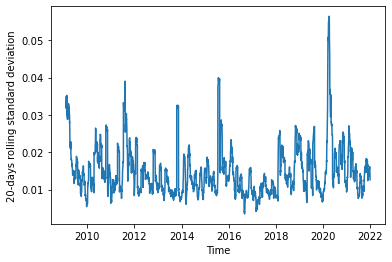

In [24]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

It’s clear that it’s not a constant value, but it has spikes and oscillations. The fat tails of the distribution may be caused by these volatility spikes, which create non-neglectable outliers.

### CDF
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
* Lets explain in cdf graph of bening radiues mean
* in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdf with two different method

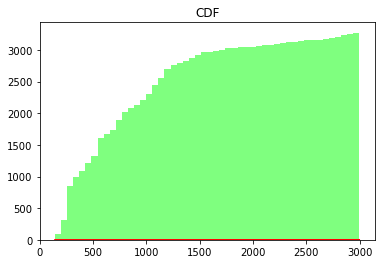

In [25]:
plt.hist(google["Close"],bins=50,fc=(0,1,0,0.5),label='Bening',cumulative = True) ;
sorted_data = np.sort(google["Close"]) ;
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)  ;
plt.plot(sorted_data,y,color='red') ;
plt.title('CDF') ;
plt.show() ;

### Relationship Between Variables
* We can say that two variables are related with each other, if one of them gives information about others
For example, close price and open price.

Scatter Plot
Simplest way to check relationship between two variables
Lets look at relationship between close price and open price of google stock

In scatter plot you can see that when open Price increases, Close price also increases. Therefore, they are positively correlated with each other.


### Correlation 
* Strength of the relationship between two variables
Lets look at correlation between all features of this data

* we can see lots of number
* The range of this numbers are -1 to 1.
* Meaning of 1 is two variable are positively correlated with each other like Low and high
* Meaning of zero is there is no correlation between variables
* Meaning of -1 is two variables are negatively correlated with each other

<Figure size 1080x720 with 0 Axes>

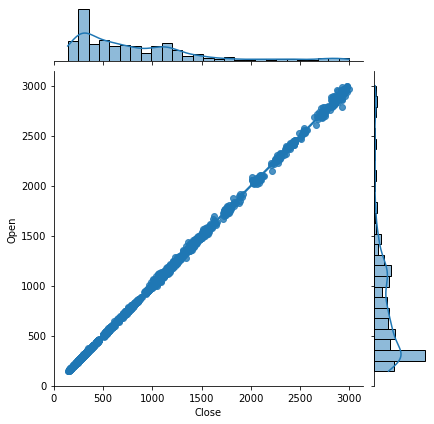

In [26]:
plt.figure(figsize = (15,10))
sns.jointplot(google["Close"],google["Open"],kind="reg")
plt.show()

### we can look relationship between more than 2 distribution

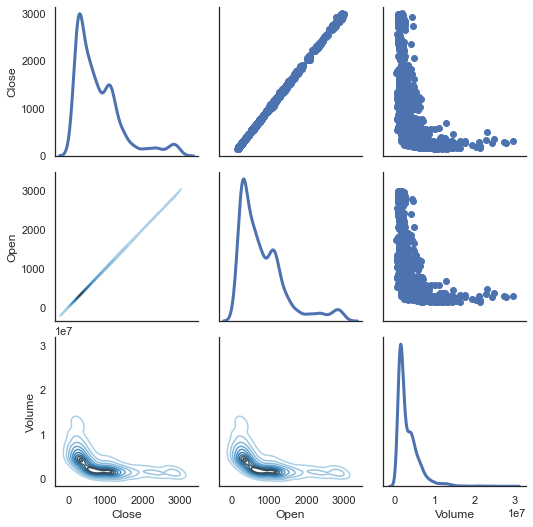

In [27]:
sns.set(style = "white")
df = google.loc[:,["Close","Open","Volume"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

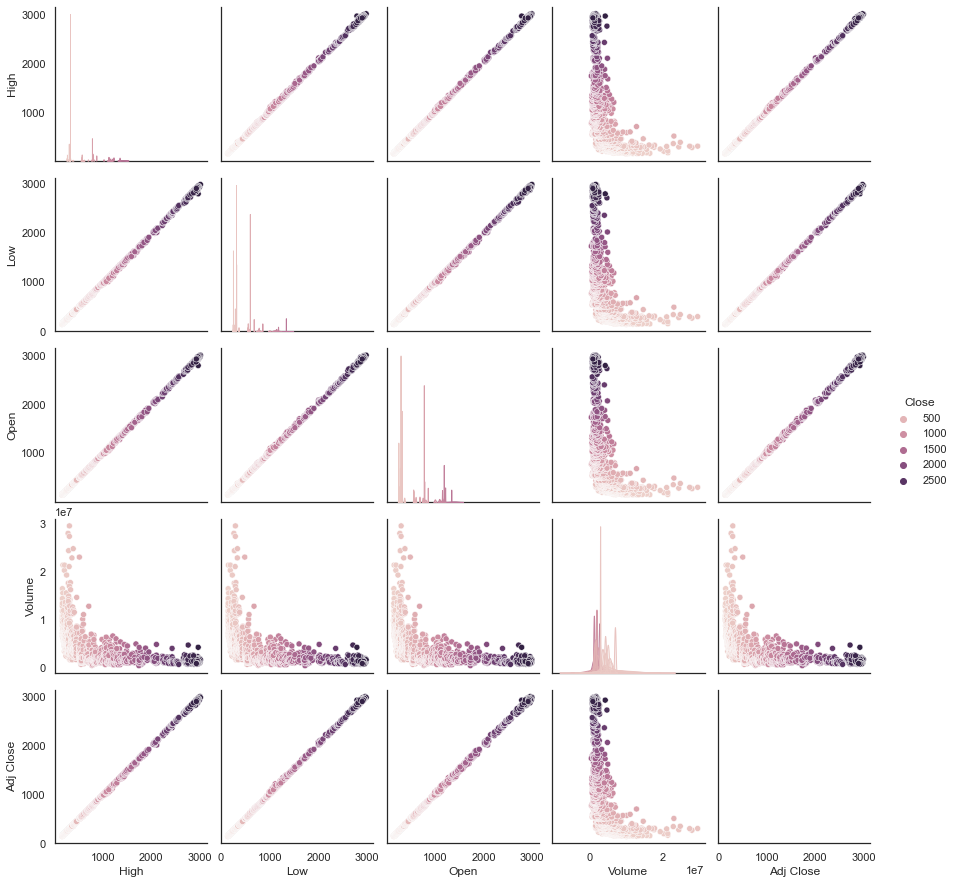

In [28]:
sns.pairplot(google, hue='Close')


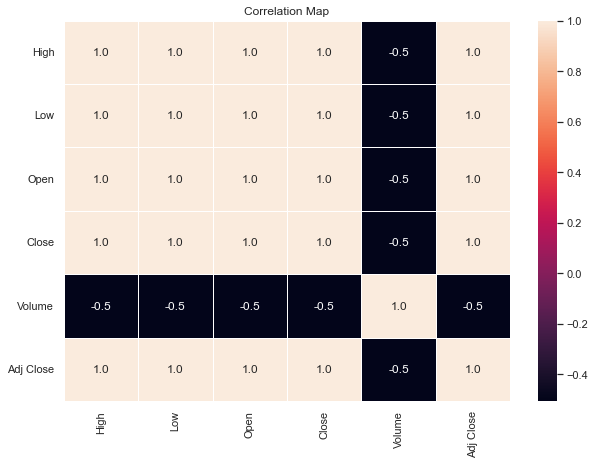

In [29]:
f,ax=plt.subplots(figsize = (10,7))
sns.heatmap(google.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

### Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction

In [30]:
np.cov(google["Close"],google["Open"])

print("Covariance between google Close and google Open: ",google["Close"].cov(google["Open"]))
print("Covariance between google Close and google High: ",google["Close"].cov(google["High"]))

Covariance between google Close and google Open:  391922.45654577645
Covariance between google Close and google High:  395575.2729260265


### confidence interval

What is a Confidence Interval?
Confidence intervals are an essential part of inferential statistics, upon which most market research is based. 

Put simply, in statistics, a confidence interval is a type of interval estimate that is computed from the data that has been observed from a sample. In other words, a confidence interval is a range of values that researchers can be fairly certain their true value of interest lies in.

A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of 
confidence.

In statistics, a confidence interval is a range of values that is determined through the use of observed data, calculated at a desired confidence level that may contain the true value of the parameter being studied. The confidence level, for example, a 95% confidence level, relates to how reliable the estimation procedure is, not the degree of certainty that the computed confidence interval contains the true value of the parameter being studied.

### What is a Confidence Level?
All confidence intervals are constructed at a confidence level — for instance, 95 percent. The confidence level is selected by the researchers conducting the statistical analysis. 
If a confidence level is 95 percent, it means that if the same population were to be sampled on multiple occasions, and estimates of a parameter were made on each occasion, the resulting intervals would include the true population parameter in approximately 95 percent of the cases. 

* Find the number of samples
* Calculate the mean (x) of the the samples
* Calculate the standard deviation
* Decide the confidence interval that will be used.
* Find the Z value for the selected confidence interval

##### calculate the 95% confidence interval for the population mean weight.

There is a 99% chance that the confidence interval of [778.7824811932619, 880.8115474932615] contains the true population mean height .


In [31]:
sample_size = 1000
sample = np.random.choice(a= google["Close"], size= sample_size)
sample_mean= sample.mean()

z_critical= stats.norm.ppf(q= 0.995) #Confidence Level 99%

print("z-critical value:")
print(z_critical)

pop_stdev= google["Close"].std()

margin_of_error = z_critical*(pop_stdev/(math.sqrt(sample_size)))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
2.5758293035489004
Confidence interval:
(772.063505271631, 874.0925715716306)


In [32]:
sample_size = 1000
sample = np.random.choice(a= google["Close"], size= sample_size)
sample_mean= sample.mean()

z_critical= stats.norm.ppf(q= 0.975) #Confidence Level 95%

print("z-critical value:")
print(z_critical)

pop_stdev= google["Close"].std()

margin_of_error = z_critical*(pop_stdev/(math.sqrt(sample_size)))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(804.0046539401079, 881.6391831570601)


In [33]:
#define given sample data
data = google["Close"]
#Calculate the sample parameters
confidenceLevel = 0.95   # 95% CI given
degrees_freedom = len(data)-1  #sample size-1
sampleMean = np.mean(data)    #sample mean
sampleStandardError = st.sem(data)  #sample standard error
#create 95% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
print('The 95% confidence interval for the population mean :',confidenceInterval)

The 95% confidence interval for the population mean : (802.3820080944132, 845.3102005357229)


### Shapiro Test
The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

This function returns a test statistic and a corresponding p-value. If the p-value is below a certain significance level, then we have sufficient evidence to say that the sample data does not come from a normal distribution.

The following code shows how to perform a Shapiro-Wilk test on this sample of 100 data values to determine if it came from a normal distribution

Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

In [34]:
sampleData = data.sample(n = 100)
shapiro(sampleData)

ShapiroResult(statistic=0.864694356918335, pvalue=4.308180834300401e-08)

## Chi-Squared Test of Independence
The Chi-Squared is a widely used statistical hypothesis test to determine whether observed results are significantly different from expected results or not.

In trading, we can use the Chi-Squared test to determine how meaningful or statistically significant the performance that follows a specific pattern is.


### OK now let's compare some company with each other using statistics

### boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed

In [35]:
googleClosePrice = google['Close']
appleClosePrice = apple['Close']
microsoftClosePrice = microsoft['Close']
fbClosePrice = fb['Close']
nvidiaClosePrice = nvidia['Close']
amdClosePrice = amd['Close']
amazonClosePrice = amazon['Close']
netflixClosePrice = netflix['Close']
teslaClosePrice = tesla['Close']
fordClosePrice  = ford['Close']
gmClosePrice    = gm['Close']


googleVolume = google['Volume']
appleVolume = apple['Volume']
microsoftVolume = microsoft['Volume']
fbVolume = fb['Volume']
nvidiaVolume = nvidia['Volume']
amdVolume = amd['Volume']
amazonVolume = amazon['Volume']
netflixVolume = netflix['Volume']
teslaVolume = tesla['Volume']
fordVolume  = ford['Volume']
gmVolume    = gm['Volume']


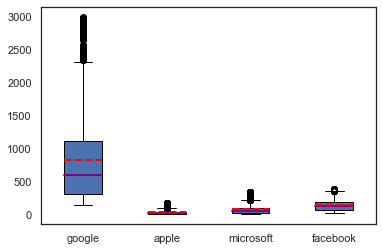

In [36]:
fig, ax = plt.subplots()
ax.boxplot((google['Close'],apple['Close'],microsoft['Close'],fb['Close']), vert=True, showmeans=True, meanline=True,
           labels=('google', 'apple', 'microsoft', 'facebook', ), patch_artist = True,
           medianprops={'linewidth':2, 'color':'purple'},
           meanprops={'linewidth':2, 'color':'red'})
plt.show()


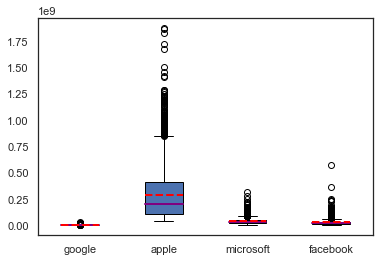

In [37]:
fig, ax = plt.subplots()
ax.boxplot((google['Volume'],apple['Volume'],microsoft['Volume'],fb['Volume']), vert=True, showmeans=True, meanline=True,
           labels=('google', 'apple', 'microsoft', 'facebook', ), patch_artist = True,
           medianprops={'linewidth':2, 'color':'purple'},
           meanprops={'linewidth':2, 'color':'red'})
plt.show()


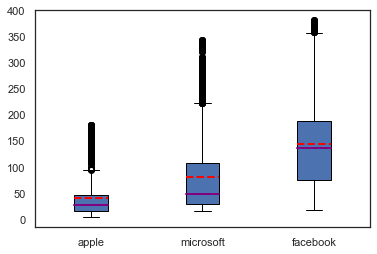

In [38]:
fig, ax = plt.subplots()
ax.boxplot((apple['Close'],microsoft['Close'],fb['Close']), vert=True, showmeans=True, meanline=True,
           labels=('apple', 'microsoft', 'facebook', ), patch_artist = True,
           medianprops={'linewidth':2, 'color':'purple'},
           meanprops={'linewidth':2, 'color':'red'})
plt.show()

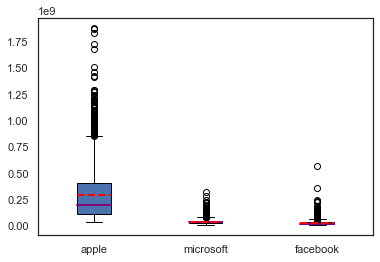

In [39]:
fig, ax = plt.subplots()
ax.boxplot((apple['Volume'],microsoft['Volume'],fb['Volume']), vert=True, showmeans=True, meanline=True,
           labels=('apple', 'microsoft', 'facebook', ), patch_artist = True,
           medianprops={'linewidth':2, 'color':'purple'},
           meanprops={'linewidth':2, 'color':'red'})
plt.show()

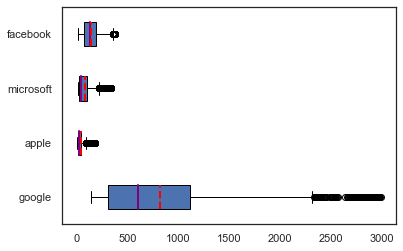

In [40]:
fig, ax = plt.subplots()
ax.boxplot((google['Close'],apple['Close'],microsoft['Close'],fb['Close']), vert=False, showmeans=True, meanline=True,
           labels=('google', 'apple', 'microsoft', 'facebook', ), patch_artist = True,
           medianprops={'linewidth':2, 'color':'purple'},
           meanprops={'linewidth':2, 'color':'red'})
plt.show()

# Pie Chart
Pie charts show the parts-to-whole relationship
A pie chart is a circle that is divided into areas, or slices. Each slice represents the count or percentage of the observations of a level for the variable.

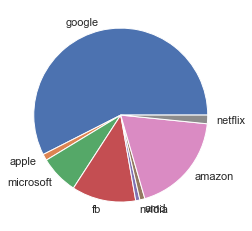

In [41]:
fig, ax = plt.subplots()
ax.pie((googleClosePrice.iloc[1], appleClosePrice.iloc[1], microsoftClosePrice.iloc[1], fbClosePrice.iloc[1], nvidiaClosePrice.iloc[1], amdClosePrice.iloc[1], amazonClosePrice.iloc[1], netflixClosePrice.iloc[1]),
       labels=('google', 'apple', 'microsoft', 'fb', 'nvidia', 'amd', 'amazon', 'netflix'))
plt.show()

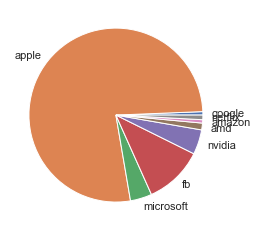

In [42]:
fig, ax = plt.subplots()
ax.pie((googleVolume.iloc[1], appleVolume.iloc[1], microsoftVolume.iloc[1], fbVolume.iloc[1], nvidiaVolume.iloc[1], amdVolume.iloc[1], amazonVolume.iloc[1], netflixVolume.iloc[1]),
       labels=('google', 'apple', 'microsoft', 'fb', 'nvidia', 'amd', 'amazon', 'netflix'))
plt.show()

# Bar Chart
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

In [43]:
TechCompanyName = ["google", "apple", "microsoft", "fb", "nvidia", "amd", "amazon", "netflix"]

TechCompanyClosePrice = [googleClosePrice.iloc[1], appleClosePrice.iloc[1], microsoftClosePrice.iloc[1], fbClosePrice.iloc[1], nvidiaClosePrice.iloc[1], amdClosePrice.iloc[1], amazonClosePrice.iloc[1], netflixClosePrice.iloc[1]]
TechCompanyVolume = [googleVolume.iloc[1], appleVolume.iloc[1], microsoftVolume.iloc[1], fbVolume.iloc[1], nvidiaVolume.iloc[1], amdVolume.iloc[1], amazonVolume.iloc[1], netflixVolume.iloc[1]]


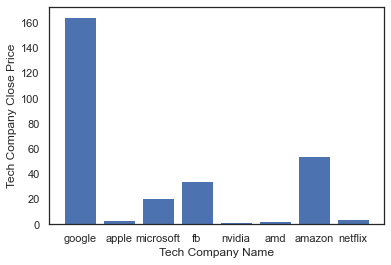

In [44]:
fig, ax = plt.subplots()
ax.bar(TechCompanyName, TechCompanyClosePrice)
ax.set_xlabel('Tech Company Name')
ax.set_ylabel('Tech Company Close Price')
plt.show()

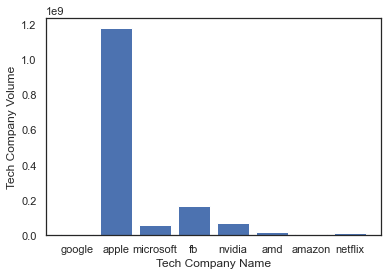

In [45]:
fig, ax = plt.subplots()
ax.bar(TechCompanyName, TechCompanyVolume)
ax.set_xlabel('Tech Company Name')
ax.set_ylabel('Tech Company Volume')
plt.show()

In [46]:
StartDate = dt.datetime(2018, 1, 1)
EndDate   = dt.datetime(2022, 1, 1)

google = web.DataReader("GOOGL", data_source='yahoo', start =StartDate, end=EndDate ) 
apple = web.DataReader("AAPL", data_source='yahoo', start =StartDate, end=EndDate ) 
microsoft = web.DataReader("MSFT", data_source='yahoo', start =StartDate, end=EndDate ) 
fb = web.DataReader("FB", data_source='yahoo', start =StartDate, end=EndDate )
nvidia = web.DataReader("NVDA", data_source='yahoo', start =StartDate, end=EndDate )
tesla = web.DataReader("TSLA", data_source='yahoo', start =StartDate, end=EndDate )
amd = web.DataReader("AMD", data_source='yahoo', start =StartDate, end=EndDate )


In [47]:
statistics.stdev(google["Close"])

584.17439450624

In [48]:
statistics.variance(google["Close"])

341259.7231967322

In [49]:
statistics.harmonic_mean(google["Close"])

1410.8277856241505

### Correlation coefficients are used to measure how strong a relationship is between two variables. 
* A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other.

* A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other.

* Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

In [50]:
googleCorr = google.corr()
googleCorr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999588,0.999695,0.999686,-0.215686,0.999686
Low,0.999588,1.000000,0.999669,0.999706,-0.233222,0.999706
Open,0.999695,0.999669,1.000000,0.999349,-0.223319,0.999349
Close,0.999686,0.999706,0.999349,1.000000,-0.225840,1.000000
Volume,-0.215686,-0.233222,-0.223319,-0.225840,1.000000,-0.225840
Adj Close,0.999686,0.999706,0.999349,1.000000,-0.225840,1.000000


In [51]:
googleCorr.style.background_gradient(cmap="coolwarm")

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999588,0.999695,0.999686,-0.215686,0.999686
Low,0.999588,1.000000,0.999669,0.999706,-0.233222,0.999706
Open,0.999695,0.999669,1.000000,0.999349,-0.223319,0.999349
Close,0.999686,0.999706,0.999349,1.000000,-0.225840,1.000000
Volume,-0.215686,-0.233222,-0.223319,-0.225840,1.000000,-0.225840
Adj Close,0.999686,0.999706,0.999349,1.000000,-0.225840,1.000000


<AxesSubplot:>

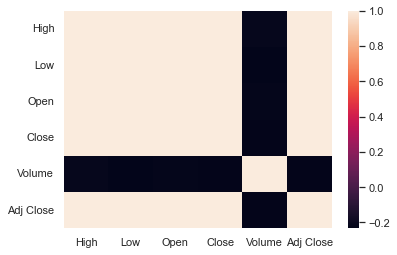

In [52]:
sns.heatmap(google.corr())

<AxesSubplot:>

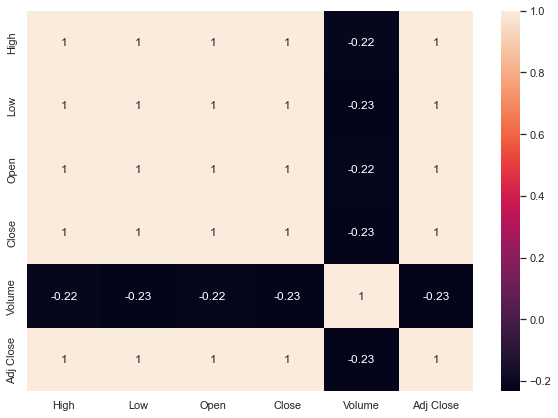

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(google.corr(), annot = True)

In [54]:
stocks = 'FB AMZN NFLX AMD GOOGL AAPL'
stocks = stocks.split()
StockData = yf.download(stocks, '2020-01-01', '2022-01-01')['Close']

[*********************100%***********************]  6 of 6 completed


In [55]:
StockData.head()

,AAPL,AMD,AMZN,FB,GOOGL,NFLX
Date,,,,,,
2019-12-31,73.412498,45.860001,1847.839966,205.250000,1339.390015,323.570007
2020-01-02,75.087502,49.099998,1898.010010,209.779999,1368.680054,329.809998
2020-01-03,74.357498,48.599998,1874.969971,208.669998,1361.520020,325.899994
2020-01-06,74.949997,48.389999,1902.880005,212.600006,1397.810059,335.829987
2020-01-07,74.597504,48.250000,1906.859985,213.059998,1395.109985,330.750000


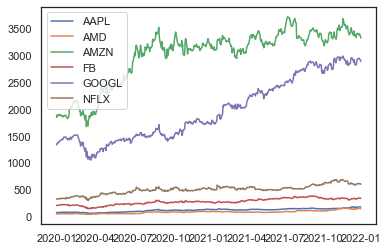

In [56]:
plt.plot(StockData)
plt.legend(["AAPL" , "AMD" , "AMZN" , "FB" , "GOOGL" , "NFLX"], loc = 2)

<AxesSubplot:>

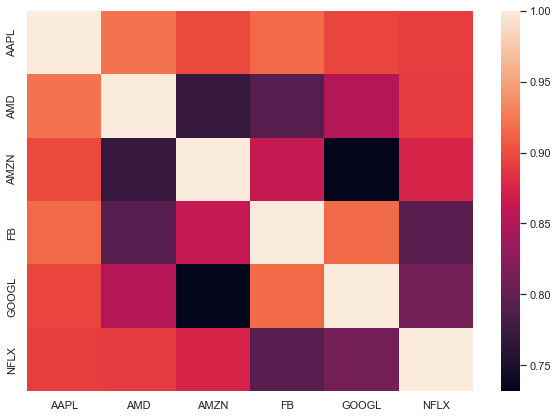

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(StockData.corr())

<AxesSubplot:>

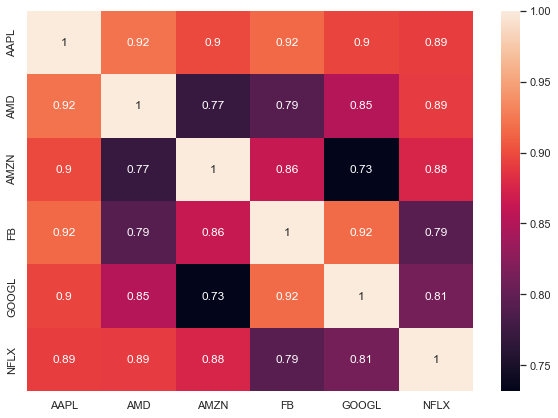

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(StockData.corr(), annot = True)

In [59]:
StockData.describe()

,AAPL,AMD,AMZN,FB,GOOGL,NFLX
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,118.034669,83.273538,3009.404464,277.629467,1979.482373,502.058734
std,29.477612,27.145393,523.389037,56.849979,579.392351,82.898855
min,56.092499,38.709999,1676.609985,146.009995,1054.130005,298.839996
25%,91.315624,56.232500,2881.599976,235.744995,1479.094971,468.520004
50%,123.645000,82.235001,3197.425049,273.815002,1774.184998,505.709991
75%,141.060001,93.762497,3354.077454,329.202499,2481.350037,546.660004
max,180.330002,161.910004,3731.409912,382.179993,2996.770020,691.690002


In [60]:
applevar = StockData['AAPL'].pct_change().apply(lambda x: np.log(1+x))
applevar.head()

Date
2019-12-31         NaN
2020-01-02    0.022560
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
Name: AAPL, dtype: float64

In [61]:
applevar2 = StockData['AAPL'].pct_change()
applevar2.head()

Date
2019-12-31         NaN
2020-01-02    0.022816
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
Name: AAPL, dtype: float64

In [62]:
StockData.pct_change().apply(lambda x: np.log(1+x)).std()


AAPL     0.023606
AMD      0.032986
AMZN     0.020231
FB       0.024365
GOOGL    0.020290
NFLX     0.024909
dtype: float64

### Part 3

In [63]:
StartDate = dt.datetime(2016, 1, 1)
EndDate   = dt.datetime(2021, 1, 1)
# EndDate = dt.datetime.now()

amazon = web.DataReader("AMZN", data_source='yahoo' , start=StartDate , end=EndDate )

In [64]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988


In [65]:
amazon_close  = amazon["Close"]
amazon_return = round(np.log(amazon_close).diff() * 100 , 2)
amazon_return.head()

Date
2016-01-04     NaN
2016-01-05   -0.50
2016-01-06   -0.18
2016-01-07   -3.98
2016-01-08   -0.15
Name: Close, dtype: float64

In [66]:
print(amazon["Close"].std())

745.7353777875728


<AxesSubplot:xlabel='Date'>

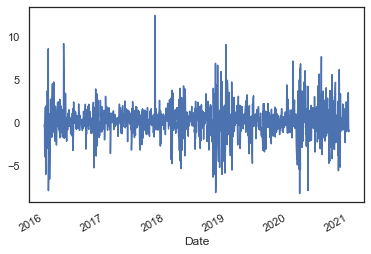

In [67]:
amazon_return.plot()

<AxesSubplot:xlabel='Date'>

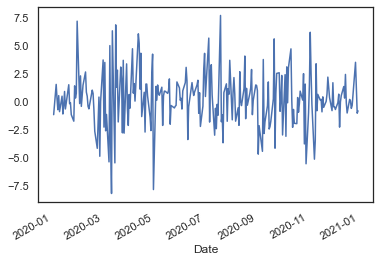

In [68]:
amazon_return[-252:].plot()

In [69]:
amazon_return.dropna(inplace=True)
amazon_return.describe()

count    1258.000000
mean        0.129714
std         1.903948
min        -8.250000
25%        -0.680000
50%         0.145000
75%         1.057500
max        12.410000
Name: Close, dtype: float64

In [70]:
#scipy

stats.describe(amazon_return)

DescribeResult(nobs=1258, minmax=(-8.25, 12.41), mean=0.12971383147853738, variance=3.62501773824927, skewness=0.11322951948063226, kurtosis=4.533398415899481)

In [71]:
n, minmax,mean , var , skew, kurt = stats.describe(amazon_return)

In [72]:
mean

0.12971383147853738

In [73]:
min , max = minmax

In [74]:
std = var ** .5

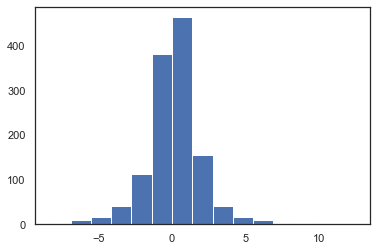

In [75]:
plt.hist(amazon_return, bins = 15);

In [76]:
from scipy.stats import norm
x = norm.rvs(mean , std , n)

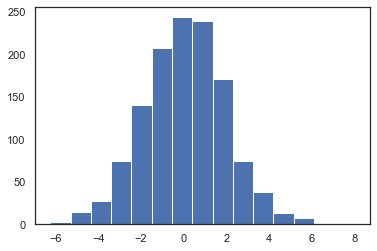

In [77]:
plt.hist(x , bins = 15);

is price change normally distributed ?

use the scipy stats to test the kurtosis , the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distrubuted variable

In [79]:
x_test = stats.kurtosistest(x)
amazon_test = stats.kurtosistest(amazon_return)
print(f'{"           Test Statistic":20}{"p-value":>17}')
print(f'{"-"* 40}')
print(f" x:{x_test[0]:> 17.2f} {x_test[1]:16.4f}")
print(f"AMAZON: {amazon_test[0]:13.2f}{amazon_test[1]:16.4f}")

           Test Statistic          p-value
----------------------------------------
 x:             1.54           0.1224
AMAZON:         11.61          0.0000


In [82]:
print("Test Statistic")
print("     X test 0       : " , x_test[0])
print("     amazon_test 0  : " ,amazon_test[0])

print("p-value")
print("     X test 1       : " , x_test[1])
print("     amazon_test 1  : " ,amazon_test[1])

Test Statistic
     X test 0       :  1.544727626186979
     amazon_test 0  :  11.612296010458838
p-value
     X test 1       :  0.12241215964678735
     amazon_test 1  :  3.5690144212233802e-31


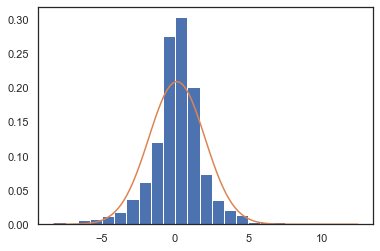

In [83]:
plt.hist(amazon_return, bins = 25 , edgecolor = 'w' , density=True ) ;
overlay = np.linspace(min,max, 100)
plt.plot(overlay, norm.pdf(overlay , mean, std));

### is daily price change significantly different from zero ?

the price change does not have any directional bias

In [84]:
stats.ttest_1samp(amazon_return, 0 , alternative='two-sided')

Ttest_1sampResult(statistic=2.416415095988097, pvalue=0.015815911269884752)

In [85]:
stats.ttest_1samp(amazon_return.sample(252), 0 , alternative='two-sided')

Ttest_1sampResult(statistic=-0.787384081705795, pvalue=0.43179993647636006)

can price movement be descrive as a random walk ?

In [86]:
amazon_close = pd.DataFrame(amazon_close, columns=['Close'])
amazon_close['lag_1'] = amazon_close.Close.shift(1)
amazon_close['lag_2'] = amazon_close.Close.shift(2)
amazon_close.dropna(inplace=True)
amazon_close.head()

,Close,lag_1,lag_2
Date,,,
2016-01-06,632.650024,633.789978,636.989990
2016-01-07,607.940002,632.650024,633.789978
2016-01-08,607.049988,607.940002,632.650024
2016-01-11,617.739990,607.049988,607.940002
2016-01-12,617.890015,617.739990,607.049988


#### Fit Linear model

In [87]:
lr = np.linalg.lstsq(amazon_close[['lag_1' , 'lag_2']], amazon_close['Close'], rcond = None)[0]

In [88]:
amazon_close['predict'] = np.dot(amazon_close[['lag_1' , 'lag_2']] , lr )
amazon_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2016-01-06,632.650024,633.789978,636.989990,634.803328
2016-01-07,607.940002,632.650024,633.789978,633.523187
2016-01-08,607.049988,607.940002,632.650024,610.369590
2016-01-11,617.739990,607.049988,607.940002,607.874091
2016-01-12,617.890015,617.739990,607.049988,617.797594


<AxesSubplot:xlabel='Date'>

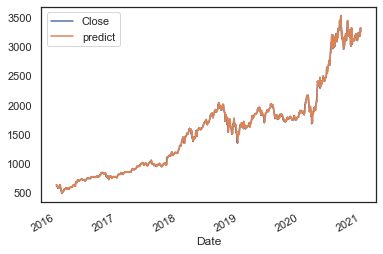

In [89]:
amazon_close[['Close', 'predict']].plot()

<AxesSubplot:xlabel='Date'>

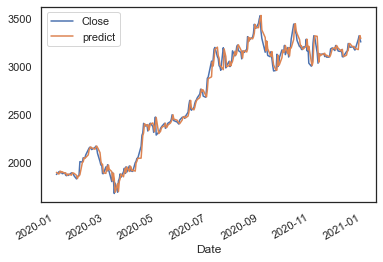

In [90]:
amazon_close.iloc[-252:][['Close', 'predict']].plot()

### Part 4 - Car Factory Data and Corrolation between them and analyse data

In [91]:
StartDate = dt.datetime(2012, 1, 1)
EndDate   = dt.datetime(2017, 1, 1)
# EndDate = dt.datetime.now()


tesla = web.DataReader("TSLA", data_source='yahoo', start =StartDate, end=EndDate ) #tesla
ford  = web.DataReader("F", data_source='yahoo', start =StartDate, end=EndDate ) #ford
gm    = web.DataReader("GM", data_source='yahoo', start =StartDate, end=EndDate ) #General Motors

In [92]:
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv')

In [93]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [94]:
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,32.558671,31.403696,31.997898,31.989245,2.551310e+07,31.989245
std,17.148543,16.649245,16.911515,16.903500,2.259037e+07,16.903500
min,5.370000,4.528000,5.324000,4.558000,1.824500e+06,4.558000
25%,8.556000,8.197000,8.403000,8.379500,1.059400e+07,8.379500
50%,40.123999,38.709000,39.410999,39.427000,2.007650e+07,39.427000
75%,45.934999,44.303000,45.214499,45.076502,3.245150e+07,45.076502
max,58.284000,56.080002,57.534000,57.208000,1.858195e+08,57.208000


In [95]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.468543
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.582618
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.777214
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.857738
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.918131


In [96]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346704
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652891


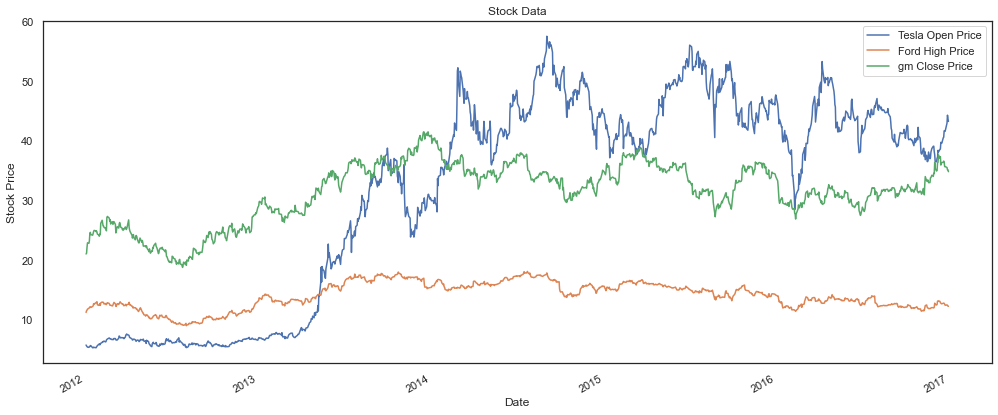

In [97]:
tesla['Open'].plot(label  = 'Tesla Open Price', figsize=(17,7) )
ford['High'].plot(label   = 'Ford High Price')
gm['Close'].plot(label    = 'gm Close Price')
plt.title("Stock Data")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Volume Traded by Tesla')

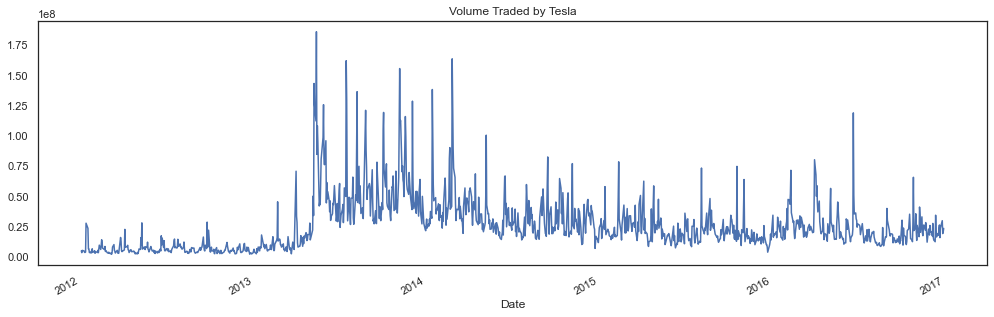

In [98]:
tesla['Volume'].plot(figsize=(17,5))
plt.title("Volume Traded by Tesla")

<function matplotlib.pyplot.show(close=None, block=None)>

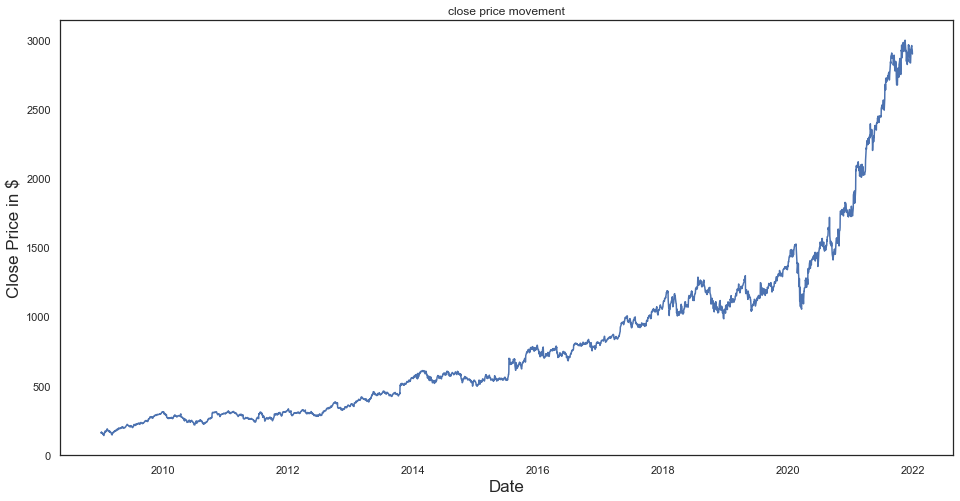

In [99]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 17)
plt.ylabel('Close Price in $' , fontsize = 17)
plt.show


In [100]:
ford.iloc[[ford['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.0,15.17,15.99,15.65,220363000.0,10.981931


In [101]:
ford['Volume'].argmax()

493

In [102]:
ford.iloc[493:500]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.00,15.17,15.99,15.65,220363000.0,10.981931
2013-12-19,15.50,15.25,15.46,15.30,84636000.0,10.736330
2013-12-20,15.50,15.32,15.35,15.42,61508000.0,10.820533
2013-12-23,15.50,15.12,15.49,15.15,59222000.0,10.631070
2013-12-24,15.23,15.10,15.20,15.19,22642200.0,10.659137
2013-12-26,15.34,15.22,15.23,15.33,24966000.0,10.757379
2013-12-27,15.35,15.25,15.35,15.30,21842000.0,10.736330


In [103]:
ford.iloc[493:500]['Open'].plot

### Total mony trade or marker cap = open * volume

In [104]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']

In [105]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07


Text(0.5, 1.0, 'Total Traded by Tesla')

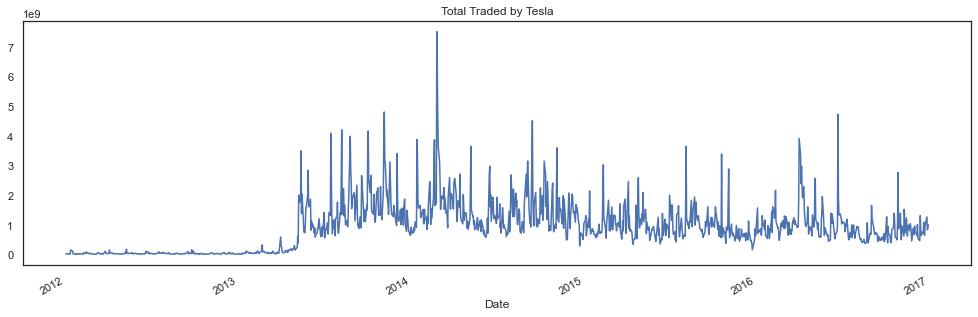

In [106]:
tesla['Total Traded'].plot(figsize=(17,5))
plt.title("Total Traded by Tesla")

In [107]:
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded']   = gm['Open'] * gm['Volume']

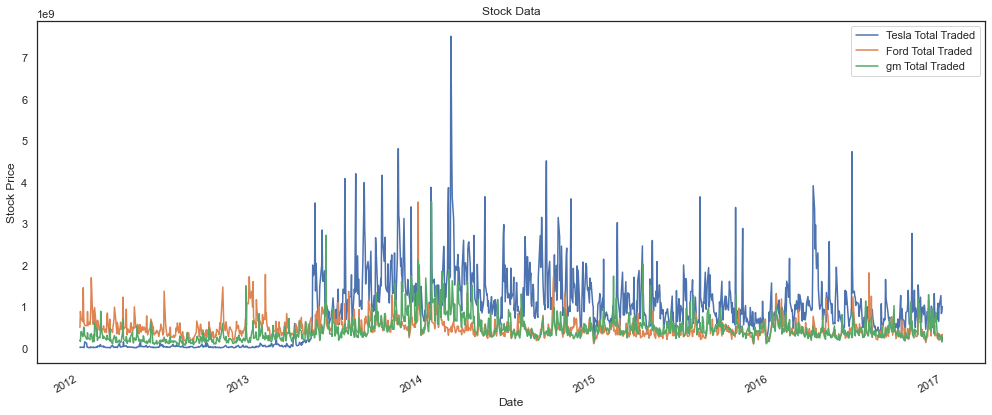

In [108]:
tesla['Total Traded'].plot(label  = 'Tesla Total Traded', figsize=(17,7) )
ford['Total Traded'].plot(label   = 'Ford Total Traded')
gm['Total Traded'].plot(label    = 'gm Total Traded')
plt.title("Stock Data")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [109]:
tesla['Total Traded'].argmax()

538

In [110]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,51.84,45.689999,46.0,49.599998,163408500,49.599998,7.516791e+09


    tesla trade high 2014-02-25

<function matplotlib.pyplot.show(close=None, block=None)>

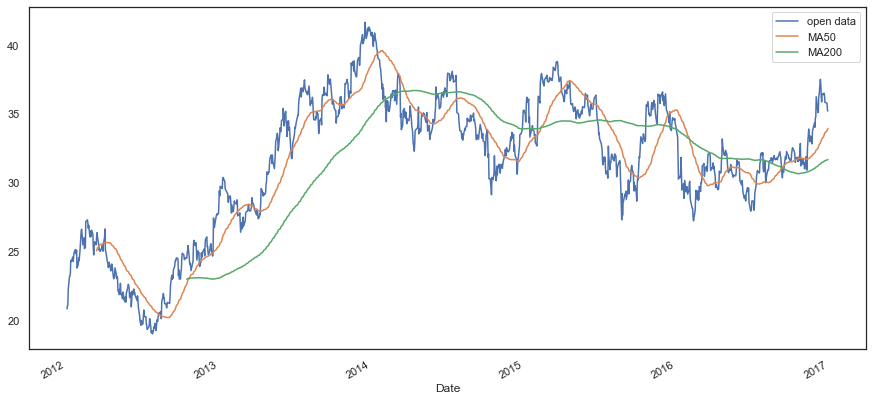

In [111]:
gm['Open'].plot(label = 'open data', figsize=(15,7))
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200'] = gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()
plt.show

### Correlation & Scatter Matrix

In [112]:
car_comp = pd.concat( [tesla['Open'],gm['Open'],ford['Open']], axis = 1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

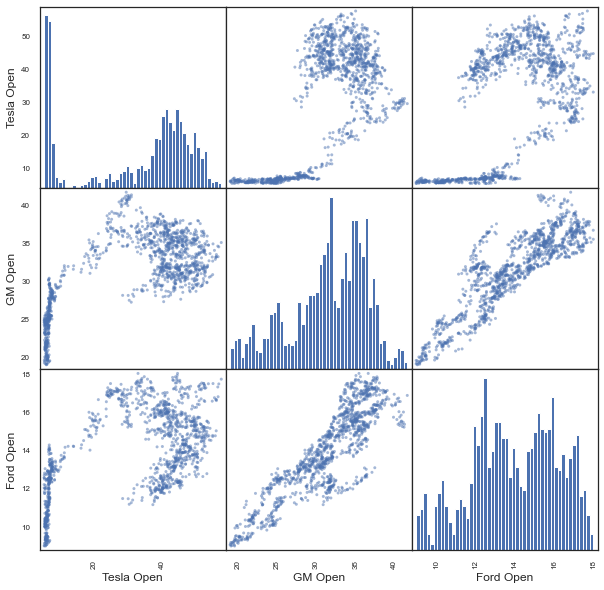

In [113]:
scatter_matrix(car_comp,figsize = (10,10), hist_kwds={'bins':50})

### so there is a positive correlation

What is a positive correlation?

A positive correlation indicates that there is a direct relationship between two variables, with both variables moving in the same direction (e.g., when one variable increases, the other does as well).

### Daily Percentage Change

rt = ( pt / pt-1 ) - 1

In [114]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1
gm['returns'] = (gm['Close'] / gm['Close'].shift(1)) - 1
ford['returns'] = (ford['Close'] / ford['Close'].shift(1)) - 1

In [115]:
tesla.dropna(inplace=True)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635
2012-01-10,5.552,5.450,5.488,5.524,3359000,5.524,1.843419e+07,0.013578


In [116]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635
2012-01-10,5.552,5.450,5.488,5.524,3359000,5.524,1.843419e+07,0.013578


<AxesSubplot:>

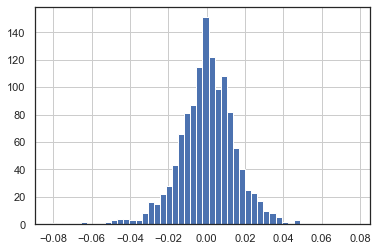

In [117]:
ford['returns'].hist(bins = 50)

#### standard deviation
The variance is equal to the square of standard deviation or the standard deviation is the square root of the variance.

<AxesSubplot:>

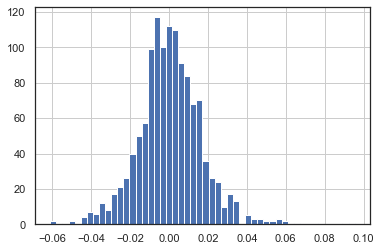

In [118]:
gm['returns'].hist(bins = 50)

<AxesSubplot:>

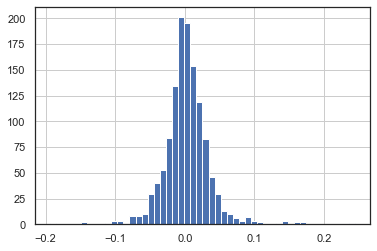

In [119]:
tesla['returns'].hist(bins = 50)

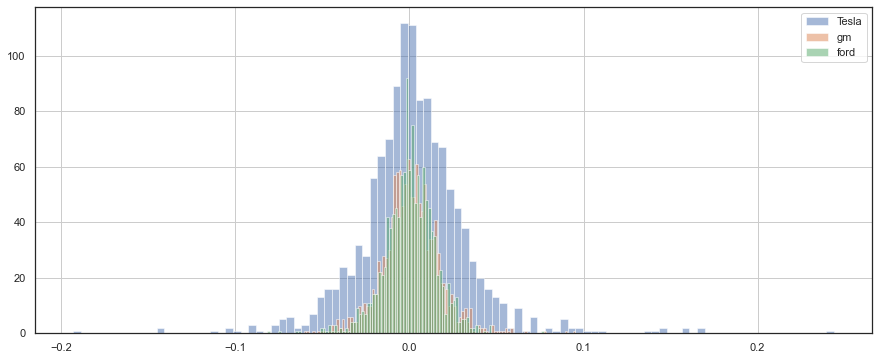

In [120]:
tesla['returns'].hist(bins = 100, label = "Tesla" , figsize = (15,6) , alpha = 0.5)
gm['returns'].hist(bins = 100, label = "gm" , alpha = 0.5)
ford['returns'].hist(bins = 100, label = "ford" , alpha = 0.5)

plt.legend()

### the tesla is wider chart and it shows tesla stock is more Volatile than gm and ford

### probability density function
its the normalize

<AxesSubplot:ylabel='Density'>

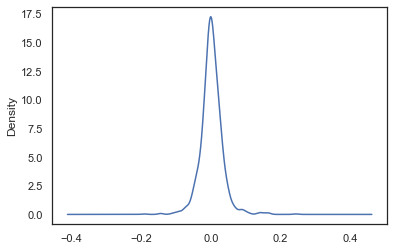

In [121]:
tesla['returns'].plot(kind='kde', label='Tesla')

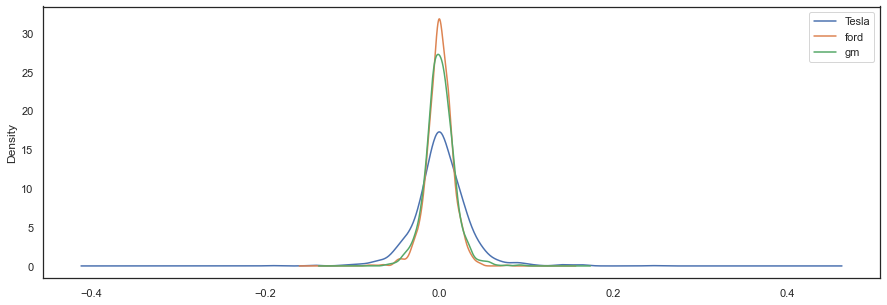

In [122]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(15,5))
ford['returns'].plot(kind='kde', label='ford')
gm['returns'].plot(kind='kde', label='gm')
plt.legend()

<AxesSubplot:>

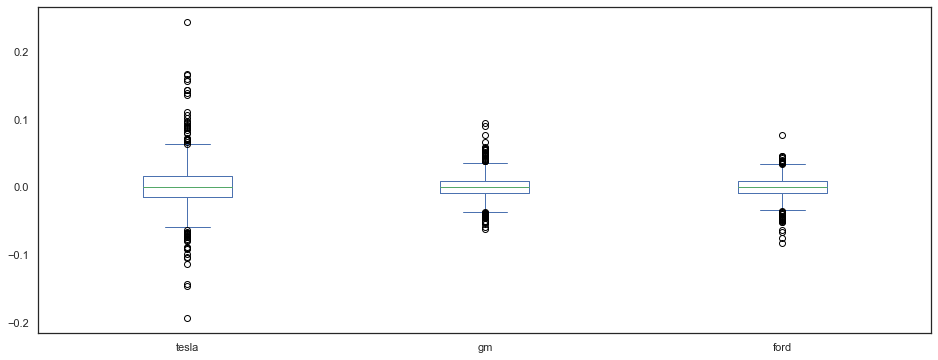

In [123]:
box_df = pd.concat( [tesla['returns'],gm['returns'],ford['returns']], axis = 1)
box_df.columns=['tesla' , 'gm' , 'ford']
box_df.plot(kind='box', figsize = (16,6))

daily percentage return is way spread out during our data time

### how related the car companies are in terms of volatility or stabelity ?

array([[<AxesSubplot:xlabel='tesla', ylabel='tesla'>,
        <AxesSubplot:xlabel='gm', ylabel='tesla'>,
        <AxesSubplot:xlabel='ford', ylabel='tesla'>],
       [<AxesSubplot:xlabel='tesla', ylabel='gm'>,
        <AxesSubplot:xlabel='gm', ylabel='gm'>,
        <AxesSubplot:xlabel='ford', ylabel='gm'>],
       [<AxesSubplot:xlabel='tesla', ylabel='ford'>,
        <AxesSubplot:xlabel='gm', ylabel='ford'>,
        <AxesSubplot:xlabel='ford', ylabel='ford'>]], dtype=object)

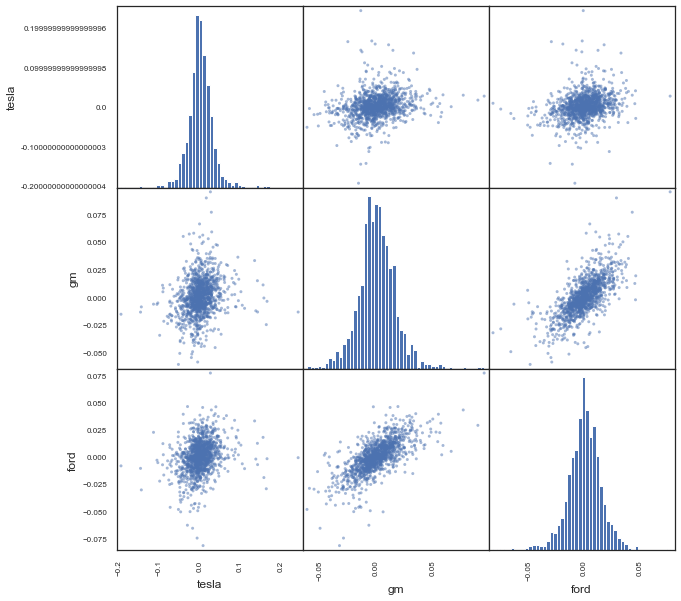

In [124]:
scatter_matrix (box_df , figsize=(10,10), hist_kwds={'bins': 50})

In [125]:
box_df.corr()

,tesla,gm,ford
tesla,1.000000,0.220867,0.261669
gm,0.220867,1.000000,0.697545
ford,0.261669,0.697545,1.000000


<AxesSubplot:>

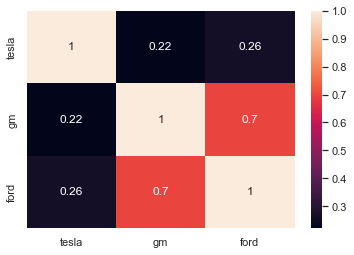

In [126]:
sns.heatmap(box_df.corr(), annot = True)

## cumulative return
Return cumulative product over a DataFrame or Series axis.
Returns a DataFrame or Series of the same size containing the cumulative product.

In [127]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [128]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635,0.970442
2012-01-10,5.552,5.450,5.488,5.524,3359000,5.524,1.843419e+07,0.013578,0.983618


In [129]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [130]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.468543,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.582618,8.889359e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.777214,7.690521e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.857738,7.025298e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.918131,6.386011e+08,0.007686,1.060198


In [131]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346704,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652891,2.803604e+08,NaN,NaN,-0.003490,1.085036


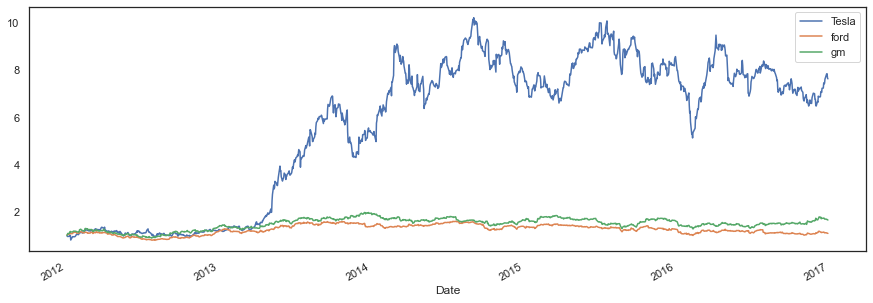

In [132]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(15,5))
ford['Cumulative Return'].plot(label='ford')
gm['Cumulative Return'].plot(label='gm')
plt.legend()

In [134]:
dataset_table=pd.crosstab(tesla['Close'] ,tesla['Cumulative Return'])
dataset_table

Cumulative Return,0.811610,0.929487,0.934829,0.947293,0.947293,0.952991,0.953348,0.954772,0.958333,0.965812,...,9.943020,9.961538,9.972222,9.982550,10.010684,10.013888,10.046652,10.051994,10.118234,10.186609
Close,,,,,,,,,,,,,,,,,,,,,
4.558000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.220000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.250000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.320000,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.352000,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56.237999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
56.422001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
56.452000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Conclusion

The stock market plays a remarkable role in our daily lives. It is a significant factor in a country's GDP (Gross Domestic Product) growth. 

The above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.

### Arian Azmoudeh
#### i hope you enjoy it